In [108]:
path = '/mnt/t3nfs01/data01/shome/micheli/CMSSW_HHbbgg/CMSSW_8_0_26/src/diphotons/Utils/macro/outPlots'

In [109]:
import glob

In [132]:
files = glob.glob('%s/out_20171130_17*_node_*transformed_MVA/cat_opt.json' % path)

In [133]:
files

['/mnt/t3nfs01/data01/shome/micheli/CMSSW_HHbbgg/CMSSW_8_0_26/src/diphotons/Utils/macro/outPlots/out_20171130_171213_node_SM_transformed_MVA/cat_opt.json']

In [134]:
import json 
import numpy as np

#summary = { x:[] for x in ['node','boundaries','ncat','fom', 'nbins'] } #,'selections']  }
summary = { x:[] for x in ['node','boundaries','ncat','fom']} #,'selections']  }


for fil in files:
    dirnam = fil.split('/')[-2]
    name = dirnam.split('node_')[-1]
    dirSuf = name.replace(name.split('_')[0]+'_','')
#    nbins = int(dirnam.split('_')[-3].split('x')[0])
    if name == str('SM_'+dirSuf): name = '0'
    node = int(name.replace('_'+dirSuf,''))
    with open(fil) as fin:
        info = json.loads(fin.read())
        fin.close()
    for key,val in info.items():
        val['node'] = node
#        val['nbins'] = nbins
        val['boundaries'] = np.array(val['boundaries'])
        #val['selections'] = np.array(val['selections'])
        for col in summary.keys():
            summary[col].append( val[col] )

# print(summary)
    

In [135]:
import pandas as pd
df = pd.DataFrame(summary)

In [136]:
df.set_index(['ncat','node'],drop=False,inplace=True)

In [137]:
df.sort_index(inplace=True)
df

,,boundaries,fom,ncat,node
ncat,node,,,,
3,0,"[1.01, 0.733, 0.576, 0.339]",-4.903,3,0


In [138]:
boundaries = np.vstack(df.loc[[3,3]]['boundaries']) 
boundaries[:,0] = 1.001
print boundaries
#boundaries=boundaries[(boundaries[:,3] > 0.1)]
boundaries

[[ 1.001  0.733  0.576  0.339]]


array([[ 1.001,  0.733,  0.576,  0.339]])

In [139]:
means = boundaries.mean(axis=0)
means

array([ 1.001,  0.733,  0.576,  0.339])

In [140]:
#boundaries.std(axis=0)

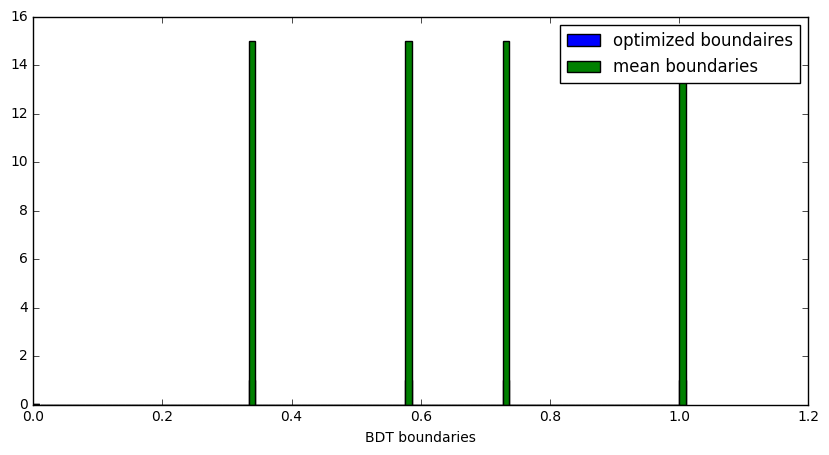

In [141]:
import matplotlib.pyplot as plt

# means[0] = 1.001
plt.figure(figsize=(10,5))
plt.hist(boundaries.ravel(),bins=100,range=[0.,1.01],label="optimized boundaires");
plt.hist(means,bins=100,range=[0.,1.01],weights=15.*np.ones_like(means),label="mean boundaries");
plt.xlabel("BDT boundaries")
plt.legend()
plt.show()

In [142]:
means

array([ 1.001,  0.733,  0.576,  0.339])